In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [10]:
#menampilkan data
df = pd.read_csv("diabetes.csv")
df.head(5)

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


# EXPLORE DATA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [12]:
#konversi data string menjadi float
df['chol_hdl_ratio'] = df['chol_hdl_ratio'].str.replace(',', '.')
df['bmi'] = df['bmi'].str.replace(',', '.')
df['waist_hip_ratio'] = df['waist_hip_ratio'].str.replace(',', '.')

df['chol_hdl_ratio'] = df['chol_hdl_ratio'].astype(float)
df['bmi'] = df['bmi'].astype(float)
df['waist_hip_ratio'] = df['waist_hip_ratio'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 48.9+ KB


In [13]:
#mengubah nilai kolom diabetes menjadi 0 dan 1
df['diabetes'] = df['diabetes'].map({'Diabetes':1, 'No diabetes':0})
df['gender'] = df['gender'].map({'female':1, 'male':0})
df.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0
1,2,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83,0
2,3,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89,0
3,4,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79,0
4,5,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82,0


In [14]:
df.describe()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,0.584615,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,1.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [15]:
#mengecek duplikasi
df.duplicated().sum()

0

In [16]:
#mengecek korelasi antar fitur
df.corr()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
patient_number,1.000000,0.252092,0.307722,-0.000842,0.188649,0.988888,-0.090170,-0.063513,-0.042151,-0.002971,0.450950,0.084154,0.156468,0.012499,0.274683,0.317830
cholesterol,0.252092,1.000000,0.158102,0.193162,0.475927,0.247333,0.030139,-0.063601,0.062359,0.091695,0.207741,0.166241,0.134038,0.093364,0.091847,0.204262
glucose,0.307722,0.158102,1.000000,-0.158302,0.282210,0.294392,-0.093372,0.098052,0.190358,0.129286,0.162777,0.020262,0.222336,0.138223,0.185117,0.689080
hdl_chol,-0.000842,0.193162,-0.158302,1.000000,-0.681867,0.028210,0.108305,-0.087238,-0.291883,-0.241860,0.031807,0.078342,-0.276697,-0.223837,-0.158777,-0.123133
chol_hdl_ratio,0.188649,0.475927,0.282210,-0.681867,1.000000,0.163201,-0.102938,0.081162,0.278812,0.228407,0.115505,0.038242,0.313262,0.208902,0.243329,0.272987
age,0.988888,0.247333,0.294392,0.028210,0.163201,1.000000,-0.084177,-0.082229,-0.056784,-0.009164,0.453417,0.068649,0.150585,0.004675,0.275188,0.301995
gender,-0.090170,0.030139,-0.093372,0.108305,-0.102938,-0.084177,1.000000,-0.677876,-0.092053,0.254189,-0.035417,-0.071043,0.045955,0.272028,-0.346253,-0.015531
height,-0.063513,-0.063601,0.098052,-0.087238,0.081162,-0.082229,-0.677876,1.000000,0.255389,-0.259589,-0.040704,0.043617,0.057447,-0.095906,0.252548,0.023466
weight,-0.042151,0.062359,0.190358,-0.291883,0.278812,-0.056784,-0.092053,0.255389,1.000000,0.860147,0.097497,0.166477,0.847766,0.826985,0.250461,0.162987
bmi,-0.002971,0.091695,0.129286,-0.241860,0.228407,-0.009164,0.254189,-0.259589,0.860147,1.000000,0.121408,0.145304,0.810701,0.881728,0.100873,0.145274


In [17]:
df[['glucose', 'diabetes']].groupby('glucose').mean().sort_values(by = 'diabetes', ascending = False)

,diabetes
glucose,
385,1.0
235,1.0
228,1.0
223,1.0
206,1.0
...,...
91,0.0
171,0.0
101,0.0


In [18]:
df[['cholesterol', 'diabetes']].groupby('cholesterol').mean().sort_values(by = 'diabetes', ascending = False)

,diabetes
cholesterol,
443,1.0
292,1.0
289,1.0
279,1.0
267,1.0
...,...
176,0.0
175,0.0
174,0.0


<Axes: >

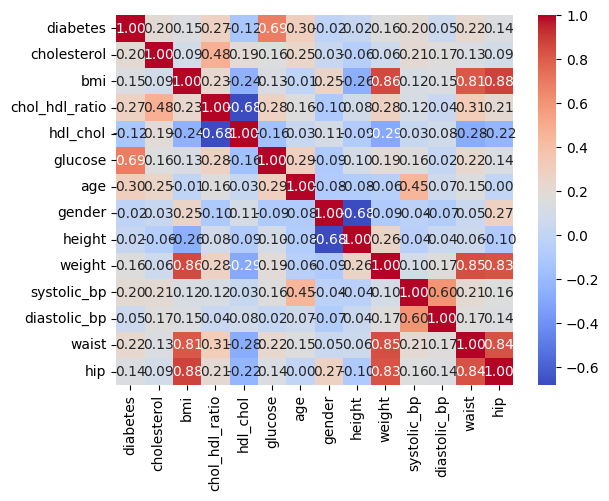

In [19]:
sns.heatmap(df[['diabetes', 'cholesterol', 'bmi', 'chol_hdl_ratio', 'hdl_chol', 'glucose', 'age', 'gender', 'height', 'weight', 'systolic_bp', 'diastolic_bp', 'waist', 'hip']].corr(),annot=True, fmt = '.2f', cmap = 'coolwarm')

# PRE-PROCESSING

In [20]:
#menghapus patient_number yang bersifat unique
df.drop(['patient_number'],inplace=True, axis=1)
df.head(5)

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0
1,146,79,41,3.6,19,1,60,135,26.4,108,58,33,40,0.83,0
2,217,75,54,4.0,20,1,67,187,29.3,110,72,40,45,0.89,0
3,226,97,70,3.2,20,1,64,114,19.6,122,64,31,39,0.79,0
4,164,91,67,2.4,20,1,70,141,20.2,122,86,32,39,0.82,0


In [21]:
df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,4.524615,46.774359,0.584615,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,0.153846
std,44.666005,53.798188,17.279069,1.736634,16.435911,0.493421,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,0.361265
min,78.000000,48.000000,12.000000,1.500000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,81.000000,38.000000,3.200000,34.000000,0.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,0.000000
50%,203.000000,90.000000,46.000000,4.200000,44.500000,1.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,0.000000
75%,229.000000,107.750000,59.000000,5.400000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,0.000000
max,443.000000,385.000000,120.000000,19.300000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,1.000000


In [22]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# MACHINE LEARNING

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2023)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nKNN:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9615384615384616

KNN:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.85      0.92      0.88        12

    accuracy                           0.96        78
   macro avg       0.92      0.94      0.93        78
weighted avg       0.96      0.96      0.96        78



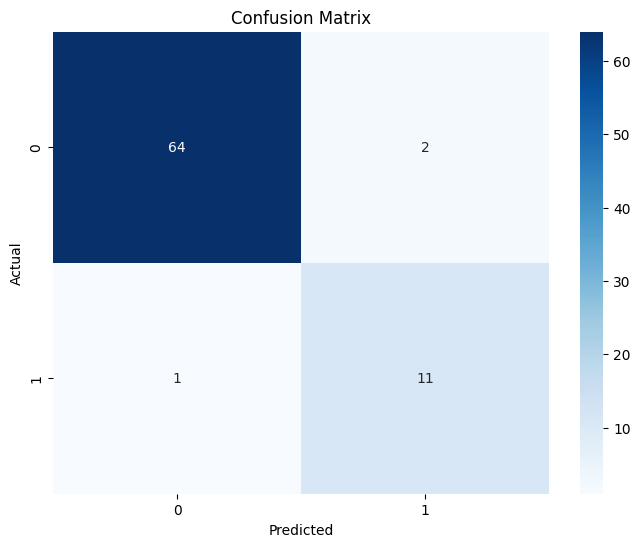

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.87301587 0.88888889 0.88709677 0.96774194 0.98387097]
Mean accuracy: 0.9201228878648233
